## Modulação Digital (modulação, demodulação e desempenho em ruído AWGN) - Parte 01

### Prática 1: Receptor ótimo para Sinais Ortogonais

Analisando os gráficos, o sinal no tempo com maior influência do ruído é quando a variância é 1. Visualmente é difícil de distinguir os sinais s0(t)s0(t) e s1(t)s1(t), olhando para suas formas de onda no tempo. Contudo, ao se observar a saída dos correlatores em TbTb (kk = 20 amostras), notamos que r0>r1r0>r1, quando o sinal s0(t)s0(t) é transmitido (gráficos a esquerda). De forma similar (gráficos a direita), notamos que r1>r0r1>r0, quando o sinal s1(t)s1(t) é transmitido.

Teste outros valores de variância do ruído. Verifique se a conclusão acima continua válida para a variância do ruído igual a um valor maior que os testados. Veja se existe um caso que a conclusão acima não é valida.

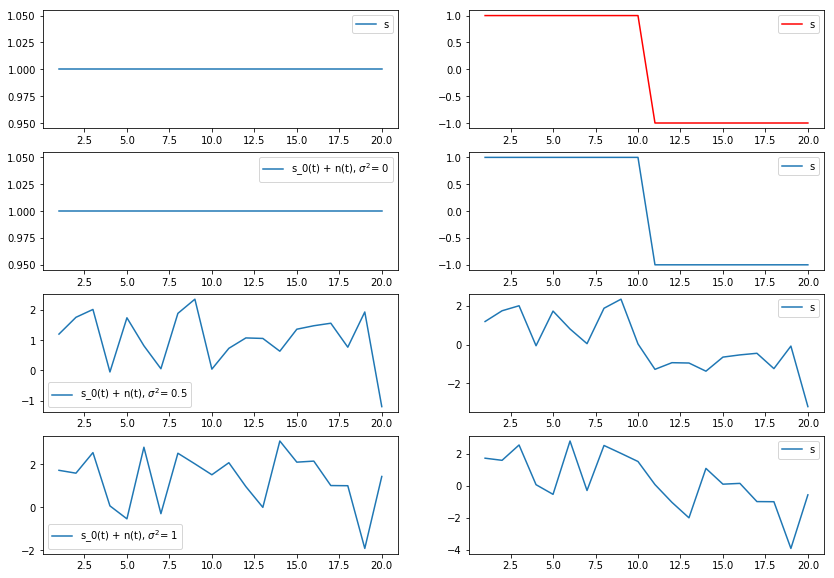

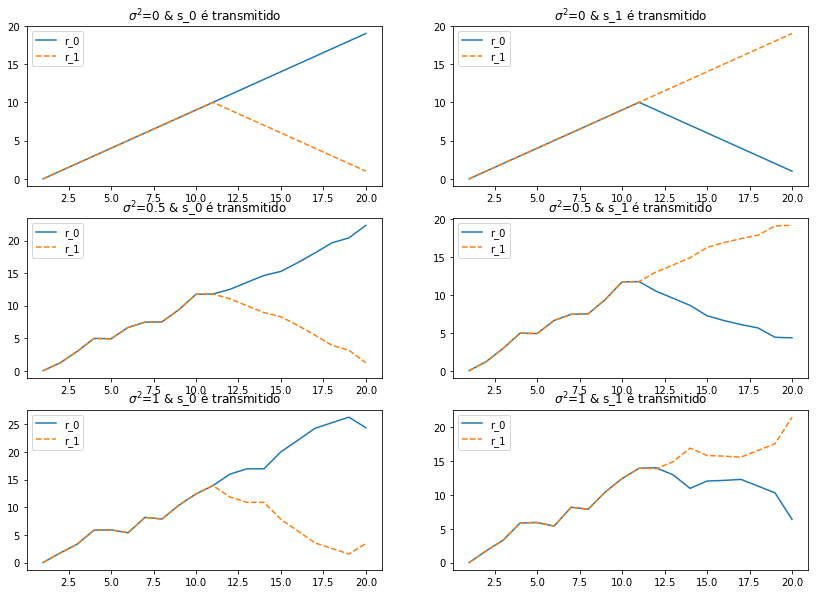

In [93]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Parametros
K = 20                                         # Número de amostras
l = np.arange(0,K+1,1)                         # Eixo amostras

# Definindo forma de onda
s_0 = np.ones(K)                               # Sinal 1: Um degrau
s_1 = np.ones((K), dtype=np.int)
s_1[10::] = -s_1[10::]

# Inicializando sinais de saida do correlator
r_0 = np.zeros(K)                              # Inicializa vetor r_0
r_1 = np.zeros(K)                              # Inicializa vetor r_1
vtVar = [0, 0.5, 1]                              # Variâncias a simular

# Figura para sinais no tempo
plt.figure(1,[14,10])
plt.subplot(4,2,1)
plt.plot(l[1::],s_0) 
plt.legend('s_0(t)')
plt.subplot(4, 2, 2 )
plt.plot(l[1::],s_1,'r')
plt.legend('s_1(t)')


# Figura para saídas dos correlatores
# Cálculo da saída do correlator para cada valor de variância do ruído
for ik in range(1,np.size(vtVar)+1):
    vtNoise = np.sqrt(vtVar[ik-1])*np.random.randn(1,K)[0]        # Vetor de ruído
    
    ## Sinais quando s_0 é transmitido
    rs_0 = s_0 + vtNoise  # Sinal recebido
    
    # Correlacionando sinais
    for n in range(K):
        r_0[n]=sum(rs_0[0:n]*s_0[0:n])
        r_1[n]=sum(rs_0[0:n]*s_1[0:n])

    # Gráficos da autocorrelação
    plt.figure(2,[14,10])
    plt.subplot(3,2,2*ik-1)
    plt.plot(l[1::],r_0,'-')
    plt.plot(l[1::],r_1,'--')
    plt.legend(['r_0','r_1'])
    plt.title('$\sigma^2$=' + str(format(vtVar[ik-1])) +  ' & s_0 é transmitido')
    
    #Gráficos do sinal+ruído no tempo
    plt.figure(1,[14,10])
    plt.subplot(4,2,2*(ik+1)-1)
    plt.plot(l[1::],rs_0)
    plt.legend(['s_0(t) + n(t), $\sigma^2$= '+ str(vtVar[ik-1])])
     
    ## Sinais quando s_1 é transmitido
    rs_1 = s_1 + vtNoise                         # Sinal recebido
    # Correlacionando sinais
    for n in range (K):
        r_0[n]=sum(rs_1[0:n]*s_0[0:n])
        r_1[n]=sum(rs_1[0:n]*s_1[0:n])
        

    # Gráficos da autocorrelação
    plt.figure(2,[14,10])
    plt.subplot(3,2,2*ik)
    plt.plot(l[1::],r_0,'-')
    plt.plot(l[1::],r_1,'--')
    plt.legend(['r_0','r_1'])
    plt.title('$\sigma^2$=' + str(format(vtVar[ik-1])) +  ' & s_1 é transmitido')
    
    #Gráficos do sinal+ruído no tempo
    plt.figure(1,[14,10])
    plt.subplot(4, 2, 2*(ik+1))
    plt.plot(l[1::],rs_1);
    plt.legend('s_1(t) + n(t), $\sigma^2$= ' + str(vtVar[ik-1]))
          

### Prática 2: Filtro casado para Sinais Ortogonais

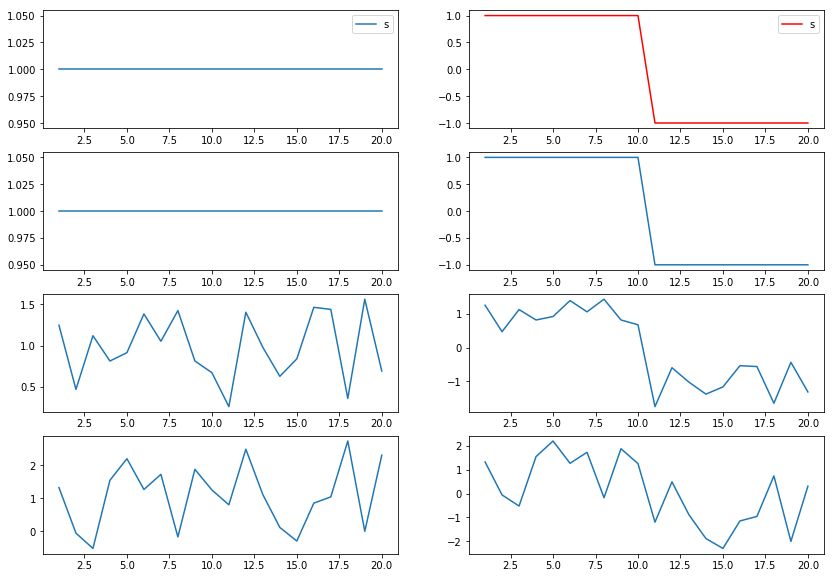

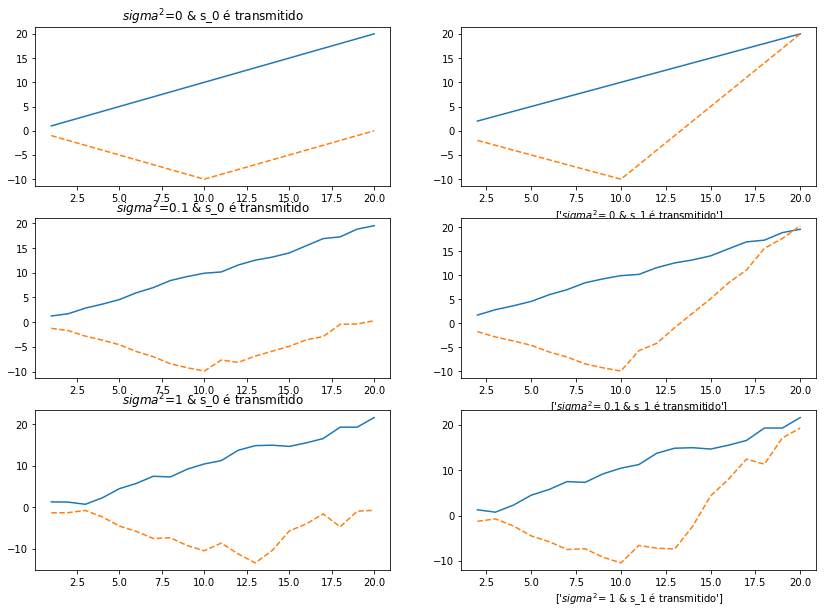

In [136]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Parametros
K = 20;                                         # Número de amostras
l = np.arange(0,K+1,1)                         # Eixo amostras

# Definindo forma de onda
s_0 = np.ones(K);                                # Sinal 1: Um degrau
s_1 = np.ones((K), dtype=np.int)                 # Sinal 2: Soma de degraus
s_1[10::] = -s_1[10::]

# Inicializando sinais de saida do correlator
r_0 = np.zeros(K)                              # Inicializa vetor r_0
r_1 = np.zeros(K)                              # Inicializa vetor r_1
vtVar = [0, 0.1, 1]                              # Variâncias a simular

# Figura para sinais no tempo
plt.figure(1,[14,10])
plt.subplot(4,2,1)
plt.plot(l[1::],s_0) 
plt.legend('s_0(t)')
plt.subplot(4, 2, 2 )
plt.plot(l[1::],s_1,'r')
plt.legend('s_1(t)')

# Figura para saídas dos correlatores
# Cálculo da saída do correlator para cada valor de variância do ruído
for ik in range(1,np.size(vtVar)+1):
    vtNoise = np.sqrt(vtVar[ik-1])*np.random.randn(0,K)        # Vetor de ruído
    vtNoise = np.sqrt(vtVar[ik-1])*np.random.randn(1,K)[0]
    
    ## Sinais quando s_0 é transmitido
    rs_0 = s_0 + vtNoise  # Sinal recebido
    
    # Filtro Casado
    r_0=np.convolve(rs_0,s_0[::-1])             # Convolução filtro casado saída 0
    r_0 = r_0[0:int(np.ceil(len(r_0)/2))]
    r_1=np.convolve(rs_0,s_1[::-1])                    # Convolução filtro casado saída 1
    r_1 = r_1[0:int(np.ceil(len(r_1)/2))]
    
    ##Gráficos 
    #
    # Gráficos da autocorrelação
    plt.figure(2,[14,10])
    plt.subplot(len(vtVar), 2, 2*ik-1 )
    plt.plot(l[1::],r_0,'-')
    plt.plot(l[1::],r_1,'--');
   # plt.legend(['r_0','r_1'])
    plt.title('$sigma^2$=' + str(format(vtVar[ik-1])) +  ' & s_0 é transmitido')
    
    # Gráficos do sinal+ruído no tempo
    plt.figure(1,[14,10])
    plt.subplot(len(vtVar)+1, 2, 2*(ik+1) - 1)
    plt.plot(l[1::],rs_0)
#plt.legend('s_0(t) + n(t), $sigma^2$ = ' +str(vtVar[ik-1]))
     
    ## Sinais quando s_1 é transmitido
    rs_1 = s_1 + vtNoise      
    r_0=np.convolve(rs_0,s_0[::-1])             # Convolução filtro casado saída 0
    r_0 = r_0[1:int(np.ceil(len(r_0)/2))]
    r_1=np.convolve(rs_1,s_1[::-1])                    # Convolução filtro casado saída 1
    r_1 = r_1[1:int(np.ceil(len(r_1)/2))]

    
    ## Gráficos 
    # Gráficos da autocorrelação
    plt.figure(2,[14,10])
    plt.subplot(len(vtVar), 2, 2*ik )
    plt.plot(l[2::],r_0,'-')
    plt.plot(l[2::],r_1,'--')
    #plt.legend('r_0','r_1')
    plt.xlabel(['$sigma^2$= ' + str(vtVar[ik-1])+ ' & s_1 é transmitido'])
    
    # Gráficos do sinal+ruído no tempo
    plt.figure(1,[10,14])
    plt.subplot(len(vtVar)+1, 2, 2*(ik+1))
    plt.plot(l[1::],rs_1)
    #plt.legend('s_1(t) + n(t), $sigma^2$ = ' + str(vtVar[ik-1]))
    
    
plt.show()


### Prática 3: Variação do sinal na entrada do detector com sinais ortogonais

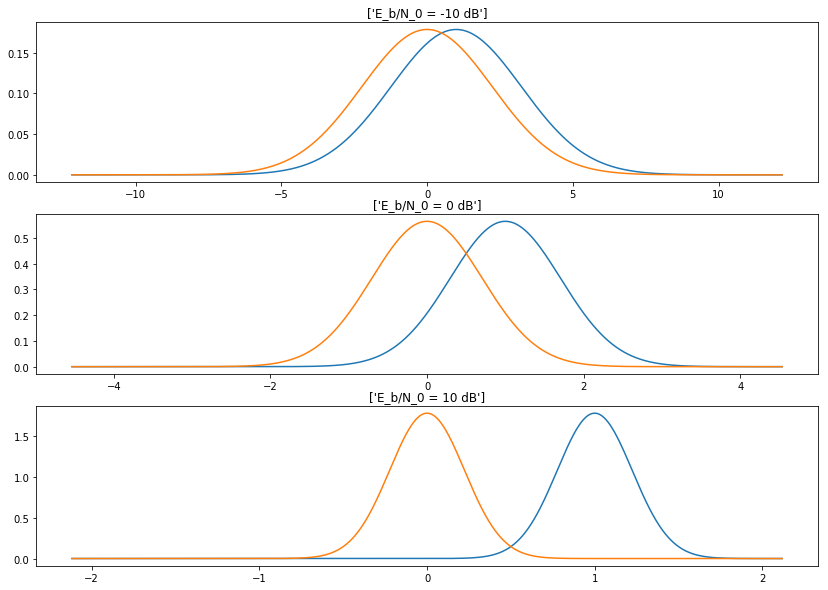

In [162]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

%matplotlib inline

## Parâmetros
Eb = 1                            # Energia dos pulsos (normalizada para 1)
Er0 = Eb                          # Média da saída do correlator 0
Er1 = 0                           # Média da saída do correlator 1
vtEbN0_dB = [-10, 0, 10]            # Eb/N0s a simular em dB

vtEbN0=np.zeros(3)
for i in range(len(vtEbN0_dB)):
    vtEbN0[i] = 10**(vtEbN0_dB[i]/10)       # Eb/N0s a simular em linear
    vtVar[i] = Eb*Eb/vtEbN0[i]/2           # Variância na entrada do detector (= EN0/2)

for ik in range(1,len(vtEbN0_dB)+1):
    dStd = np.sqrt(vtVar[ik-1]);
    x=np.arange(-5*dStd-Eb,5*dStd+Eb,0.001)
    ## Cálculo da distribuição Gausiana
    vtr_0 = norm.pdf(x,Er0,dStd);  # Valores de r0 (distribuição de probalilidade r0|s0)
    vtr_1 = norm.pdf(x,Er1,dStd);   # Valores de r1 (distribuição de probalilidade r1|s0)
    
    ## Gráficos
    plt.figure(1,[14,10])
    plt.subplot(len(vtEbN0_dB),1,ik)
    plt.plot(x,vtr_0,x,vtr_1);
    plt.title(['E_b/N_0 = '  +str(vtEbN0_dB[ik-1]) +' dB']);
    #plt.legend('p(r_{1}|s_0)','p(r_{0}|s_0)');



In [163]:
vtVar

[5.0, 0.5, 0.050000000000000003]

### Prática 4: Curva Pe teórica vs Eb/N0

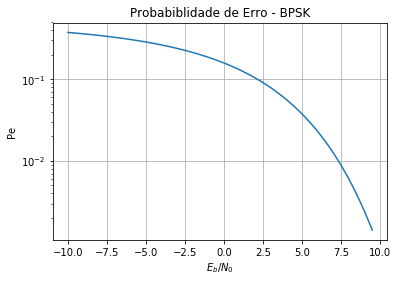

In [156]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special

%matplotlib inline

# Parâmetros
vtEbN0_dB = np.arange(-10,10,0.5)                        # Vetor de Eb/N0 a simular
vtEbN0 = 10**(vtEbN0_dB/10)

vtPe=np.zeros(len(vtEbN0))
for i in range(len(vtEbN0)):
    vtPe[i]=(1/2)*special.erfc(np.sqrt(vtEbN0[i])/np.sqrt(2))
    

plt.semilogy(vtEbN0_dB,vtPe)
plt.title('Probabiblidade de Erro - BPSK')
plt.xlabel('$E_b/N_0$')
plt.ylabel('Pe')
plt.grid()
plt.show()


### Prática 5: Simulação de Monte Carlo de um enlace de comunicação digital para sinais ortogonais

### Prática 6: Variação do sinal na entrada do detector com sinais antipodais

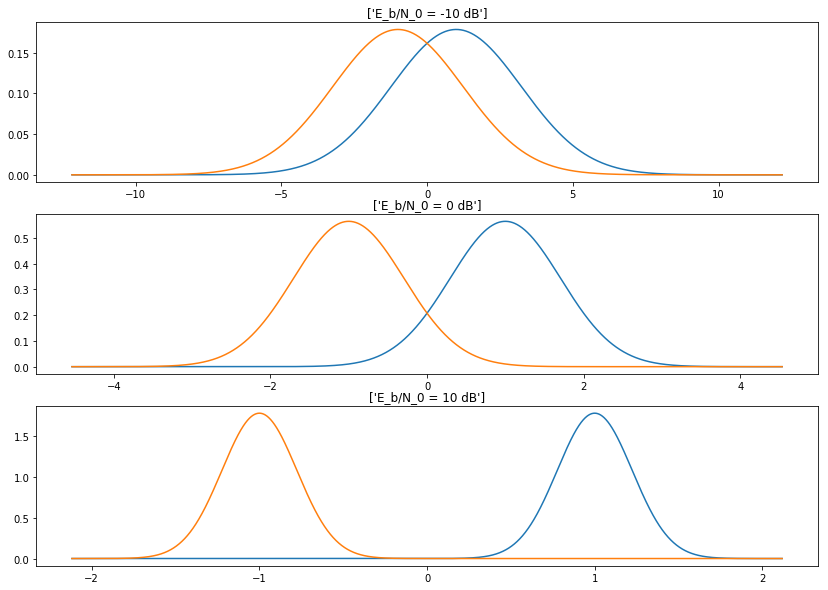

In [166]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

%matplotlib inline

## Parâmetros
Eb = 1                            # Energia dos pulsos (normalizada para 1)
Er0 = Eb                          # Média da saída do correlator quando s0 é transmitido
Er1 = -Eb                         # Média da saída do correlator quando s1 é transmitido
vtEbN0_dB = [-10, 0, 10]          # Eb/N0s a simular em dB

for i in range(len(vtEbN0_dB)):
    vtEbN0[i] = 10**(vtEbN0_dB[i]/10)       # Eb/N0s a simular em linear
    vtVar[i] = Eb*Eb/vtEbN0[i]/2           # Variância na entrada do detector (= EN0/2)

for ik in range(0,len(vtEbN0_dB)):
    dStd = np.sqrt(vtVar[ik]);
    x=np.arange(-5*dStd-Eb, 5*dStd+Eb, 0.001)
    ## Cálculo da distribuição Gausiana
    vtr_0 = norm.pdf(x,Er0,dStd)   # Valores de r0 (distribuição de probalilidade r0|s0)
    vtr_1 = norm.pdf(x,Er1,dStd)   # Valores de r1 (distribuição de probalilidade r1|s0)
    
    ## Gráficos
    plt.figure(1,[14,10])
    plt.subplot(len(vtEbN0_dB),1,ik+1)
    plt.plot(x,vtr_0,x,vtr_1);
    plt.title(['E_b/N_0 = '  +str(vtEbN0_dB[ik]) +' dB']);
    #plt.legend('p(r_{1}|s_0)','p(r_{0}|s_0)');

### Prática 7: Simulação de Monte Carlo para Sinais Antipodais